# Benchmarking

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlmc import mlmc  # Assuming this is how you import the function
from tqdm.notebook import tqdm

def benchmark_mlmc(parameter_sets, runs=5):
    """
    Benchmark the mlmc function with different parameter sets.

    Args:
        parameter_sets: List of dictionaries, each containing parameters for mlmc
        runs: Number of times to run each parameter set for averaging

    Returns:
        DataFrame with benchmark results
    """
    results = []

    for params in parameter_sets:
        total_time = 0
        total_cost = 0
        avg_error = 0
        max_levels = []

        solution = params["f"]
        x = params["x"]
        y = params["y"]
        
        for _ in tqdm(range(runs)):
            start_time = time.time()
            expectation, cost, max_level, _ = mlmc(**params)
            end_time = time.time()

            total_time += (end_time - start_time)
            total_cost += cost
            max_levels.append(max_level)
            error = abs(expectation - solution(x, y))
            avg_error += error

        avg_error /= runs
        results.append({
            **params,
            'avg_execution_time': total_time / runs,
            'avg_computational_cost': total_cost / runs,
            'avg_max_level': sum(max_levels) / len(max_levels),
            'expectation': expectation,  # Last computed value
            'avg_error': avg_error
        })

    return pd.DataFrame(results)

In [ ]:
# Example test functions from your notebook
from test_functions import sin, sin_rhs, cos, cos_rhs, sq_cos, sq_cos_rhs
from test_functions import gaussian, gaussian_rhs, exp, exp_rhs
from test_functions import poly, poly_rhs
# Define parameter sets to benchmark
parameter_sets = [
    # Varying epsilon (accuracy)
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.025},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1/(4**2)},

    # Varying dt0 (initial time step)
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.1, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.001, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.0001, 'epsilon': 0.01},

    # Different test functions
    {'x': 0.5, 'y': 0.5, 'f': cos, 'g': cos_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sq_cos, 'g': sq_cos_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': gaussian, 'g': gaussian_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': exp, 'g': exp_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': poly, 'g': poly_rhs, 'dt0': 0.01, 'epsilon': 0.01},


    # Different coordinates
    {'x': 0.25, 'y': 0.75, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.01},
]

# Run benchmarks
benchmark_results = benchmark_mlmc(parameter_sets, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

       x     y                                      f  \
0   0.50  0.50       <function sin at 0x7281c5e62b60>   
1   0.50  0.50       <function sin at 0x7281c5e62b60>   
2   0.50  0.50       <function sin at 0x7281c5e62b60>   
3   0.50  0.50       <function sin at 0x7281c5e62b60>   
4   0.50  0.50       <function sin at 0x7281c5e62b60>   
5   0.50  0.50       <function sin at 0x7281c5e62b60>   
6   0.50  0.50       <function sin at 0x7281c5e62b60>   
7   0.50  0.50       <function cos at 0x7281c5e62ca0>   
8   0.50  0.50    <function sq_cos at 0x7281c5e62de0>   
9   0.50  0.50  <function gaussian at 0x7281c5e63060>   
10  0.50  0.50       <function exp at 0x7281c5e631a0>   
11  0.50  0.50      <function poly at 0x7281c5e62f20>   
12  0.25  0.75       <function sin at 0x7281c5e62b60>   

                                            g     dt0  epsilon  \
0        <function sin_rhs at 0x7281c5e62c00>  0.0100  0.10000   
1        <function sin_rhs at 0x7281c5e62c00>  0.0100  0.02500   
2  

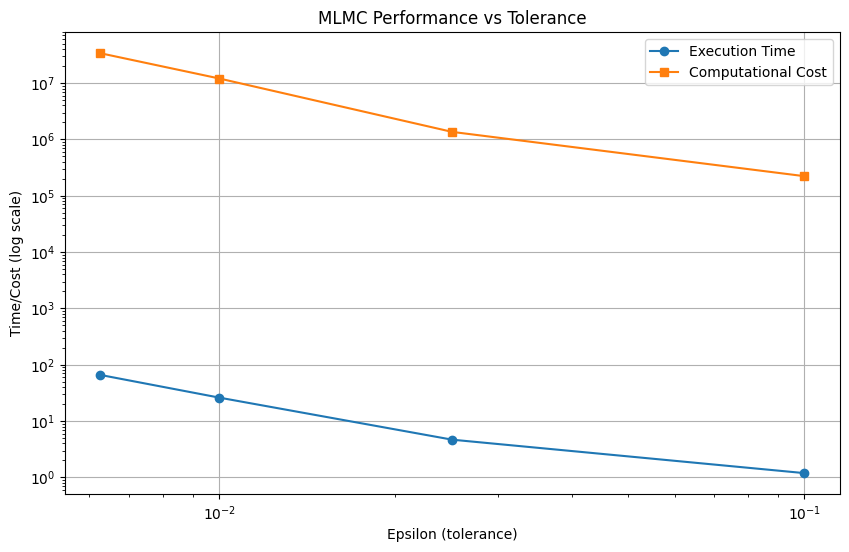

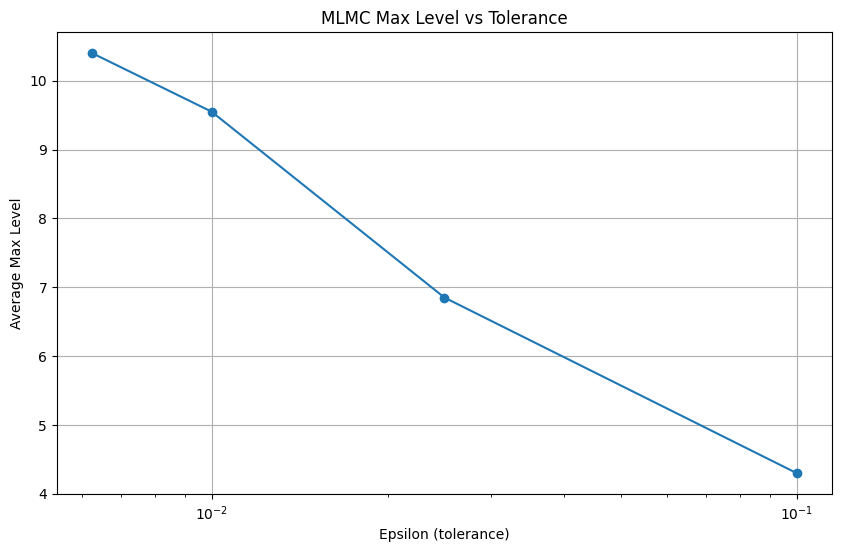

In [ ]:

# Display results table
print(benchmark_results)

# Plot execution time vs epsilon
plt.figure(figsize=(10, 6))
epsilon_results = benchmark_results[benchmark_results['x'] == 0.5]
epsilon_results = epsilon_results[epsilon_results['dt0'] == 0.01]
epsilon_results = epsilon_results[epsilon_results['f'] == sin]
epsilon_results = epsilon_results.sort_values('epsilon')

plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_execution_time'], 'o-', label='Execution Time')
plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_computational_cost'], 's-', label='Computational Cost')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Time/Cost (log scale)')
plt.title('MLMC Performance vs Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Plot max level vs epsilon
plt.figure(figsize=(10, 6))
plt.semilogx(epsilon_results['epsilon'], epsilon_results['avg_max_level'], 'o-')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Average Max Level')
plt.title('MLMC Max Level vs Tolerance')
plt.grid(True)
plt.show()

[np.float64(26.07750779390335), np.float64(2.6134043455123903), np.float64(32.25685880184174), np.float64(3.2263569116592405), np.float64(20.736409783363342), np.float64(25.72292128801346)]


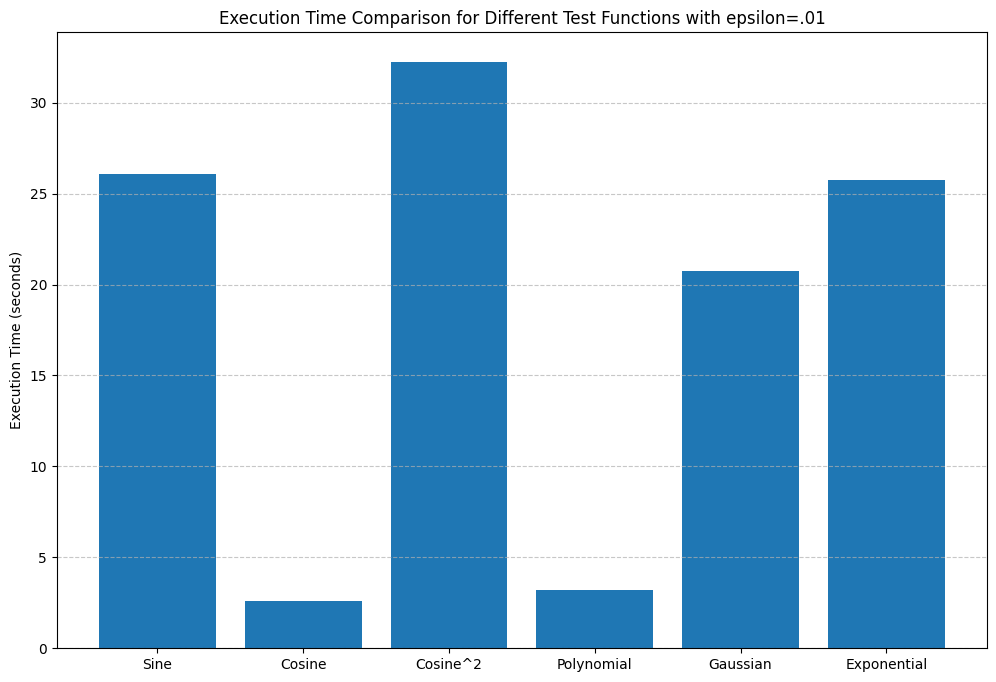

In [8]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_execution_time'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)
#let eval(expr, lower, upper) = {
  math.attach(
    lr([expr]),
    bottom: lower,
    top: upper
  )
}
plt.title('Execution Time Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig("time_comparison.png")

[28.79410846 26.07750779 24.42072805 29.97619631]
[0.1    0.01   0.001  0.0001]


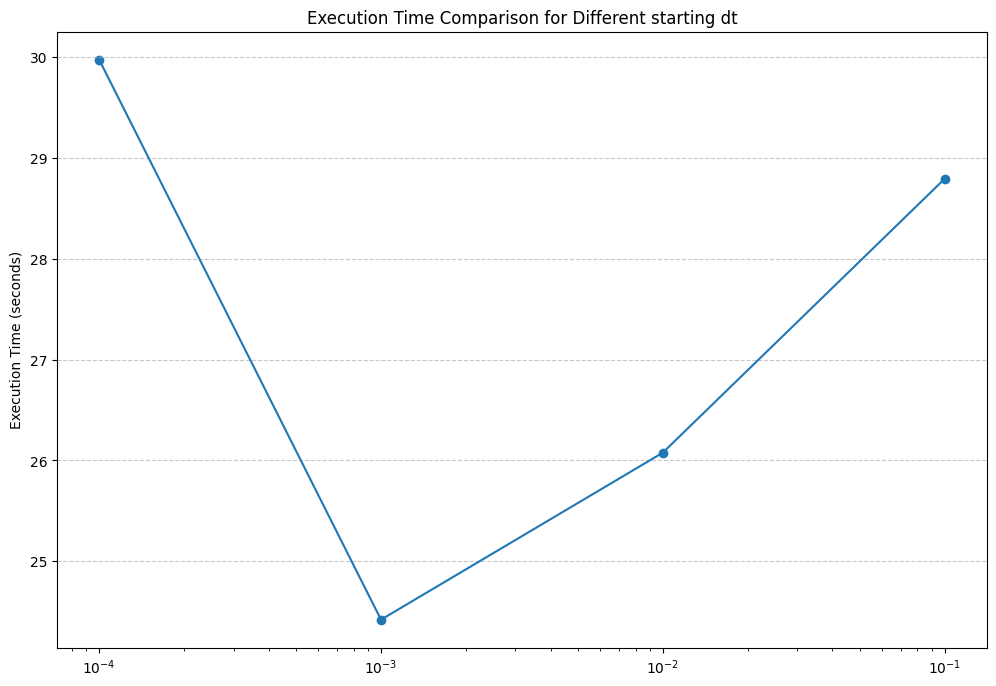

In [9]:

dt_result = benchmark_results
dt_result = benchmark_results[benchmark_results['x'] == 0.5]
dt_result = dt_result[dt_result['f'] == sin]
dt_result = dt_result[dt_result['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = dt_result['avg_execution_time'].values
print(times)
dts = dt_result['dt0'].values
print(dts)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.semilogx(
    dts,
    times
)
plt.scatter(dts, times)
plt.title('Execution Time Comparison for Different starting dt')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("time_comp_dt.png")

[np.float64(0.012434182050266663), np.float64(0.00665413760915058), np.float64(0.010794098963253524), np.float64(0.015106996772647149), np.float64(0.008652054754757794), np.float64(0.01867016610544725)]


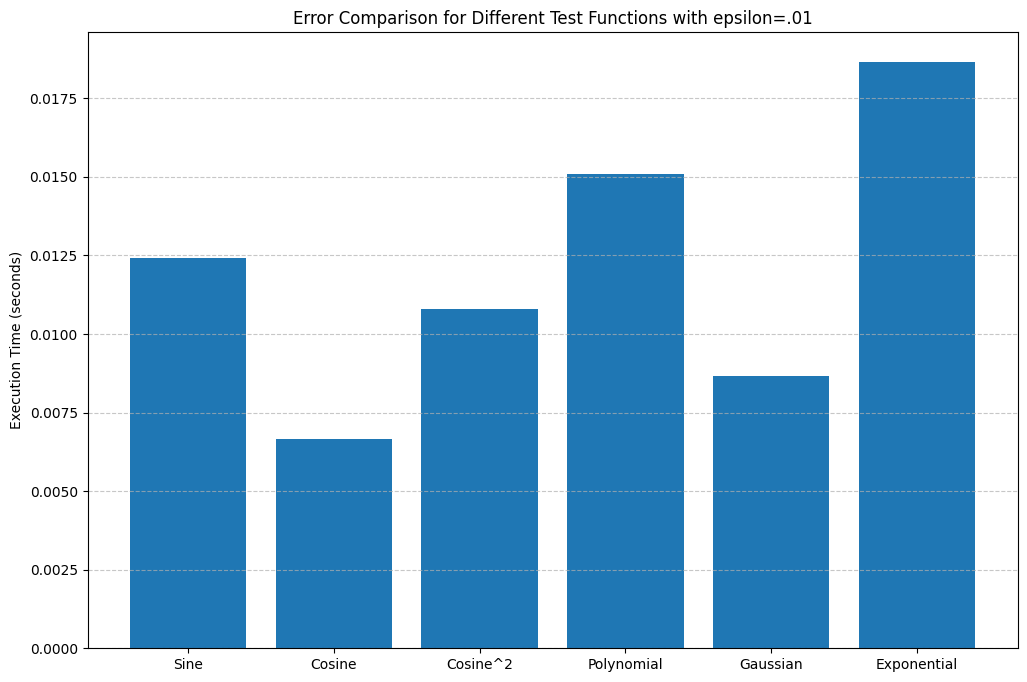

In [10]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_error'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Error Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("error_comp.png")

In [ ]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_error'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Error Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)